## 통신사의 비지니스 프로세스
* 기존 고객 이탈 방지 및 신규회원 유치가 목적이다
* 기존 이탈에 영향을 미치는 요인이 무엇인지 알아야 대처할 수 있다
* 유사한 특성을 갖는 고객들은 그룹화를 진행해야 한다

## 컬럼 정보
* 고객정보
    - customerID : 고객ID
    - gender : 성별( Femal여성, Male남성 )
    - SeniorCitizen : 연장자 여부(65세 이상) ( 0연장자 아님, 1연장자 )
    - Partner : 독신여부 ( yes독신, no독신아님 )
    - Dependents : 부양가족 유무( yes부양가족있음, no부양가족없음 )
    - tenure : 서비스 이용기간( 개월 수 )
* 가입 상품정보
    - PhoneService : 전화 서비스 이용여부(yes사용, no사용안함 )
    - MultipleLines : 다중회선 이용여부(No phone service전화서비스 이용안함, no다중회선 이용안함, yes 이용함)
    - InternetService : 인터넷 서비스 이용여부, 이용시 종류
    - OnlineSecurity : 보안 서비스 이용여부
    - DeviceProtection : 단말기 보험 서비스 이용여부
    - TechSupport : 기술지원 서비스 이용여부
    - StreamingTV : 스트리밍 TV서비스 이용여부
    - StreamingMovies : 스트리밍 영화 서비스 이용여부
* 고객 결제정보
    - Contract : 결제 갱신주기(Month-to-month매 월 / One year1년마다 / Two year2년마다)
    - PaperlessBilling : 종이없는 청구서 이용여부
    - PaymentMethod : 결제 수단(Electronic개인 계좌를 열어놓고 입금하는 방식, Mailed우편, Bank은행, Credit card신용카드)
    - MonthlyCharges : 월 청구금액
    - TotalCharges : 총 청구금액(계약기간동안 총 납부 금액)
* 기존 고객 이탈 여부
    - Churn : 고객 이탈(yes, no)

## 데이터셋 로드

In [190]:
import pandas as pd
df = pd.read_csv('data/Telcom.csv')
print( df.shape )
df.head().T

(7043, 21)


,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


## 전처리

### 결측치 확인

In [191]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### 문자열 처리

In [192]:
df.dtypes
#object의 값들을 변환해 줘야 한다.

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

* object타입들을 숫자 형태로 변환한다
>
* 성별 변환
    - Female : 0, Male : 1
* map
    - Series 타입에서만 사용가능 하다
    - Series는 1차원 배열형태가 되며 해당 값들 하나씩 지정된다

In [193]:
#성별 유일 값 확인
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [194]:
# 여성은 0, 남성은 1 변경
df['gender_num'] = df['gender'].map({'Female':0, 'Male':1 })
df.head(2).T
#성별을 숫자형태로 변환

,0,1
customerID,7590-VHVEG,5575-GNVDE
gender,Female,Male
SeniorCitizen,0,0
Partner,Yes,No
Dependents,No,No
tenure,1,34
PhoneService,No,Yes
MultipleLines,No phone service,No
InternetService,DSL,DSL
OnlineSecurity,No,Yes


* Partner(독신 여부)변경
    - Yes : 1, No : 0

In [195]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [196]:
df['Partner_num'] = df['Partner'].map({'Yes':1, 'No':0})
df.head(2).T

,0,1
customerID,7590-VHVEG,5575-GNVDE
gender,Female,Male
SeniorCitizen,0,0
Partner,Yes,No
Dependents,No,No
tenure,1,34
PhoneService,No,Yes
MultipleLines,No phone service,No
InternetService,DSL,DSL
OnlineSecurity,No,Yes


* Dependents(부양가족 유무) => Yes : 1, No : 0
* PhoneService(전화서비스 이용여부) =>  Yes : 1, No : 0
* MultipleLines(다중회선 이용여부) => No phone service : 0, No : 1, Yes : 2
* InternetService(인터넷 서비스 이용 종류)
    * DSR : 구리선으로 전송속도가 느림
    * Fiber : 광섬유로 DSR 보다 100배 빠름
    * No : 0, DSR : 1, Fiber optic : 2
* OnlineSecurity(보안 서비스 이용여부) => No : 0, Yes : 1, No internet service : 2
* OnlineBackup(정보 백업서비스 이용여부) => No : 0, Yes : 1, No internet service : 2
* DeviceProtection(단말기 보험 서비스 이용여부) => No : 0, Yes : 1, No internet service : 2
* TechSupport(기술지원 서비스 이용여부) => No : 0, Yes : 1, No internet service : 2
* StreamingTV(스트리밍 TV 서비스 이용여부) => No : 0, Yes : 1, No internet service : 2
* StreamingMovies(스트리밍 영화 서비스 이용여부) => No : 0, Yes : 1, No internet service : 2
* Contract(결제 갱신주기- 매월 / 1년마다 / 2년마다) => Month-to-month : 0, One year : 1, Two year : 2
* PaperlessBilling( 종이없는 청구서 이용여부) => No : 0, Yes : 1
* PaymentMethod(결제 수단)
    * Mailed check ( 우편 ) : 0
    * Electronic check( 개인 계좌를 열어놓고 입금하는 방식 ) : 1
    * Bank transfer (automatic) (계좌이체) : 2
    * Credit card (automatic) ( 신용카드 ) :3

In [197]:
df['Dependents_num'] = df['Dependents'].map({'Yes':1, 'No':0})
df['PhoneService_num'] = df['PhoneService'].map({'Yes':1, 'No':0})
df['MultipleLines_num'] = df['MultipleLines'].map({'No phone service':0, 'No':1, 'Yes':2})
df['InternetService_num'] = df['InternetService'].map({'No':0, 'DSL':1, 'Fiber optic':2})
df['OnlineSecurity_num'] = df['OnlineSecurity'].map({'No':0, 'Yes':1, 'No internet service':2})
df['OnlineBackup_num'] = df['OnlineBackup'].map({'No':0, 'Yes':1, 'No internet service':2})
df['DeviceProtection_num'] = df['DeviceProtection'].map({'No':0, 'Yes':1, 'No internet service':2})
df['TechSupport_num'] = df['TechSupport'].map({'No':0, 'Yes':1, 'No internet service':2})
df['StreamingTV_num'] = df['StreamingTV'].map({'No':0, 'Yes':1, 'No internet service':2})
df['StreamingMovies_num'] = df['StreamingMovies'].map({'No':0, 'Yes':1, 'No internet service':2})
df['Contract_num'] = df['Contract'].map({'Month-to-month':0, 'One year':1, 'Two year':2})
df['PaperlessBilling_num'] = df['PaperlessBilling'].map({'No':0, 'Yes':1 })
df['PaymentMethod_num'] = df['PaymentMethod'].map({'Mailed check':0, 'Electronic check':1, 'Bank transfer (automatic)':2,'Credit card (automatic)':3 })


* TotalCharges(월 청구금액) 변환시 문제가 생긴다
    - 형식은 문자형태의 실수값을 띄고 있지만 공백이 있어 실수형식으로 변환 불가능하다

In [198]:
df['TotalCharges'].unique()
#uniquer값이 너무 많아 공백을 볼 수 없다

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [199]:
df['TotalCharges'].value_counts(ascending=False)
#내림차순으로 공백을 확인할 수 있다

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [200]:
#공백이 존재하기 때문에 해당 값을 실수형태로 변환하면 에러가 발생한다
#df['TotalCharges'].apply(float)

In [201]:
df[df['TotalCharges']==' ']
#value_count에서 확인한 것과 같이 11개의 공백 데이터가 나오게 된다

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,InternetService_num,OnlineSecurity_num,OnlineBackup_num,DeviceProtection_num,TechSupport_num,StreamingTV_num,StreamingMovies_num,Contract_num,PaperlessBilling_num,PaymentMethod_num
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,1,1,0,1,1,1,0,2,1,2
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,0,2,2,2,2,2,2,2,0,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,1,1,1,1,0,1,1,2,0,0
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,0,2,2,2,2,2,2,2,0,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,1,1,1,1,1,1,0,2,0,3
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,0,2,2,2,2,2,2,2,0,0
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,0,2,2,2,2,2,2,2,0,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,0,2,2,2,2,2,2,2,0,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,0,2,2,2,2,2,2,1,1,0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,1,0,1,1,1,1,0,2,0,0


In [202]:
#공백이 되어 있는 행은 삭제한다
# 해당 위치 값들을 삭제하기 위해 index값을 얻어오자
i = df[df['TotalCharges']==' '].index
i

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [203]:
# 해당 인덱스 값들의 행을 삭제 한다.
df = df.drop(index = i, axis=0)
df[df['TotalCharges']==' '] # 확인하면 내용이 삭제된 것을 알 수 있다.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,InternetService_num,OnlineSecurity_num,OnlineBackup_num,DeviceProtection_num,TechSupport_num,StreamingTV_num,StreamingMovies_num,Contract_num,PaperlessBilling_num,PaymentMethod_num


In [204]:
#형변환 전 데이터 형식 확인
print('변환 전 : ',df['TotalCharges'].dtypes )
# float형식으로 변환
df['TotalCharges'] = df['TotalCharges'].apply(float)
#형변환 후 확인
print('변환 후 : ',df['TotalCharges'].dtypes )

변환 전 :  object
변환 후 :  float64


* 마지막 Churn(고객이탈) 변경
    - No : 0, Yes : 1

In [205]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [206]:
df['Churn_num'] = df['Churn'].map({'No':0 , 'Yes':1})
df['Churn_num'].unique()

array([0, 1], dtype=int64)

### 이상치 확인
* IQR = Q3(3사분위) - Q1(1사분위)
* 최대 이상치 = Q3 + IQR * 1.5(3.0)
* 최저 이상치 = Q1 - IQR * 1.5(3.0)
>
* Churn_num컬럼을 제외한 나머지 숫자형태의 컬럼들의 이상치 확인
    - churn_num은 label값이므로 제외한다

In [207]:
df.dtypes

customerID               object
gender                   object
SeniorCitizen             int64
Partner                  object
Dependents               object
tenure                    int64
PhoneService             object
MultipleLines            object
InternetService          object
OnlineSecurity           object
OnlineBackup             object
DeviceProtection         object
TechSupport              object
StreamingTV              object
StreamingMovies          object
Contract                 object
PaperlessBilling         object
PaymentMethod            object
MonthlyCharges          float64
TotalCharges            float64
Churn                    object
gender_num                int64
Partner_num               int64
Dependents_num            int64
PhoneService_num          int64
MultipleLines_num         int64
InternetService_num       int64
OnlineSecurity_num        int64
OnlineBackup_num          int64
DeviceProtection_num      int64
TechSupport_num           int64
Streamin

In [208]:
columns = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges','gender_num',
           'Partner_num','Dependents_num','PhoneService_num','MultipleLines_num',
           'InternetService_num','OnlineSecurity_num','OnlineBackup_num','DeviceProtection_num',
           'TechSupport_num','StreamingTV_num','StreamingMovies_num','Contract_num',
           'PaperlessBilling_num','PaymentMethod_num']
for col in columns:
    q1 = df[col].describe().loc['25%'] # 1사분위
    q3 = df[col].describe().loc['75%'] # 3사분위
    iqr = q3 - q1

    lowerfence = q1 - iqr * 1.5 # 최저 이상치
    upperfence = q3 + iqr * 1.5 # 최고 이상치
    print(col)
    print('최저 이상치 :',lowerfence,', 최고 이상치 :',upperfence)
    print('이상치\n',df[(df[col] < lowerfence) | (df[col] > upperfence)])
    print("="*50)
# 확인 결과 이상치 값은 보이지 않는다.
# 0 또는 1이 이상치로 나온건 이상치로 판단하면 안된다 경우에 수를 0또는 1로 둔 값이였다.
# 나중에 확인하고자 하는 경우 0,1로 변경한 컬럼들은 확인할 필요는 없다

SeniorCitizen
최저 이상치 : 0.0 , 최고 이상치 : 0.0
이상치
       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
20    8779-QRDMV    Male              1      No         No       1   
30    3841-NFECX  Female              1     Yes         No      71   
31    4929-XIHVW    Male              1     Yes         No       2   
34    3413-BMNZE    Male              1      No         No       1   
50    8012-SOUDQ  Female              1      No         No      43   
...          ...     ...            ...     ...        ...     ...   
7023  1035-IPQPU  Female              1     Yes         No      63   
7029  2235-DWLJU  Female              1      No         No       6   
7031  3605-JISKB    Male              1     Yes         No      55   
7032  6894-LFHLY    Male              1      No         No       1   
7041  8361-LTMKD    Male              1     Yes         No       4   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
20             No  No phone service  

#### 이상치 boxplot 확인

<AxesSubplot:ylabel='MonthlyCharges'>

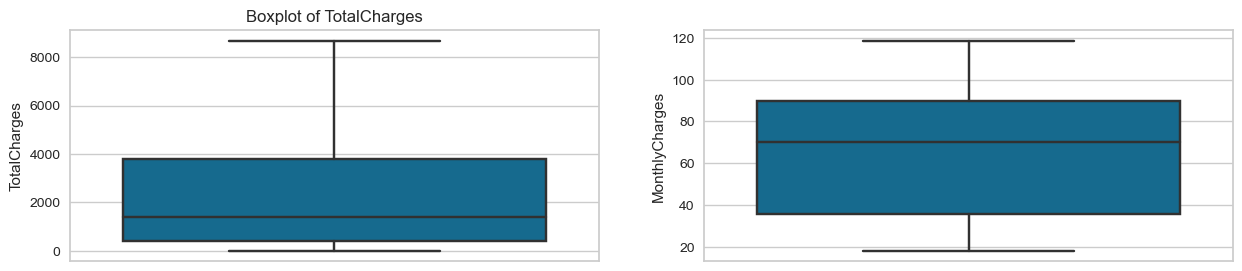

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (15,3)) #크기 : 15(가로), 3(세로)
# 여러개의 그래프를 그리고자 할때 사용 subplot(1(행 개수), 2(열개수), 1(위치))
plt.subplot(1,2, 1)
sns.boxplot(data=df, y = df['TotalCharges'])
plt.title("Boxplot of TotalCharges")

plt.subplot(1,2, 2)
sns.boxplot(data=df, y = df['MonthlyCharges'])

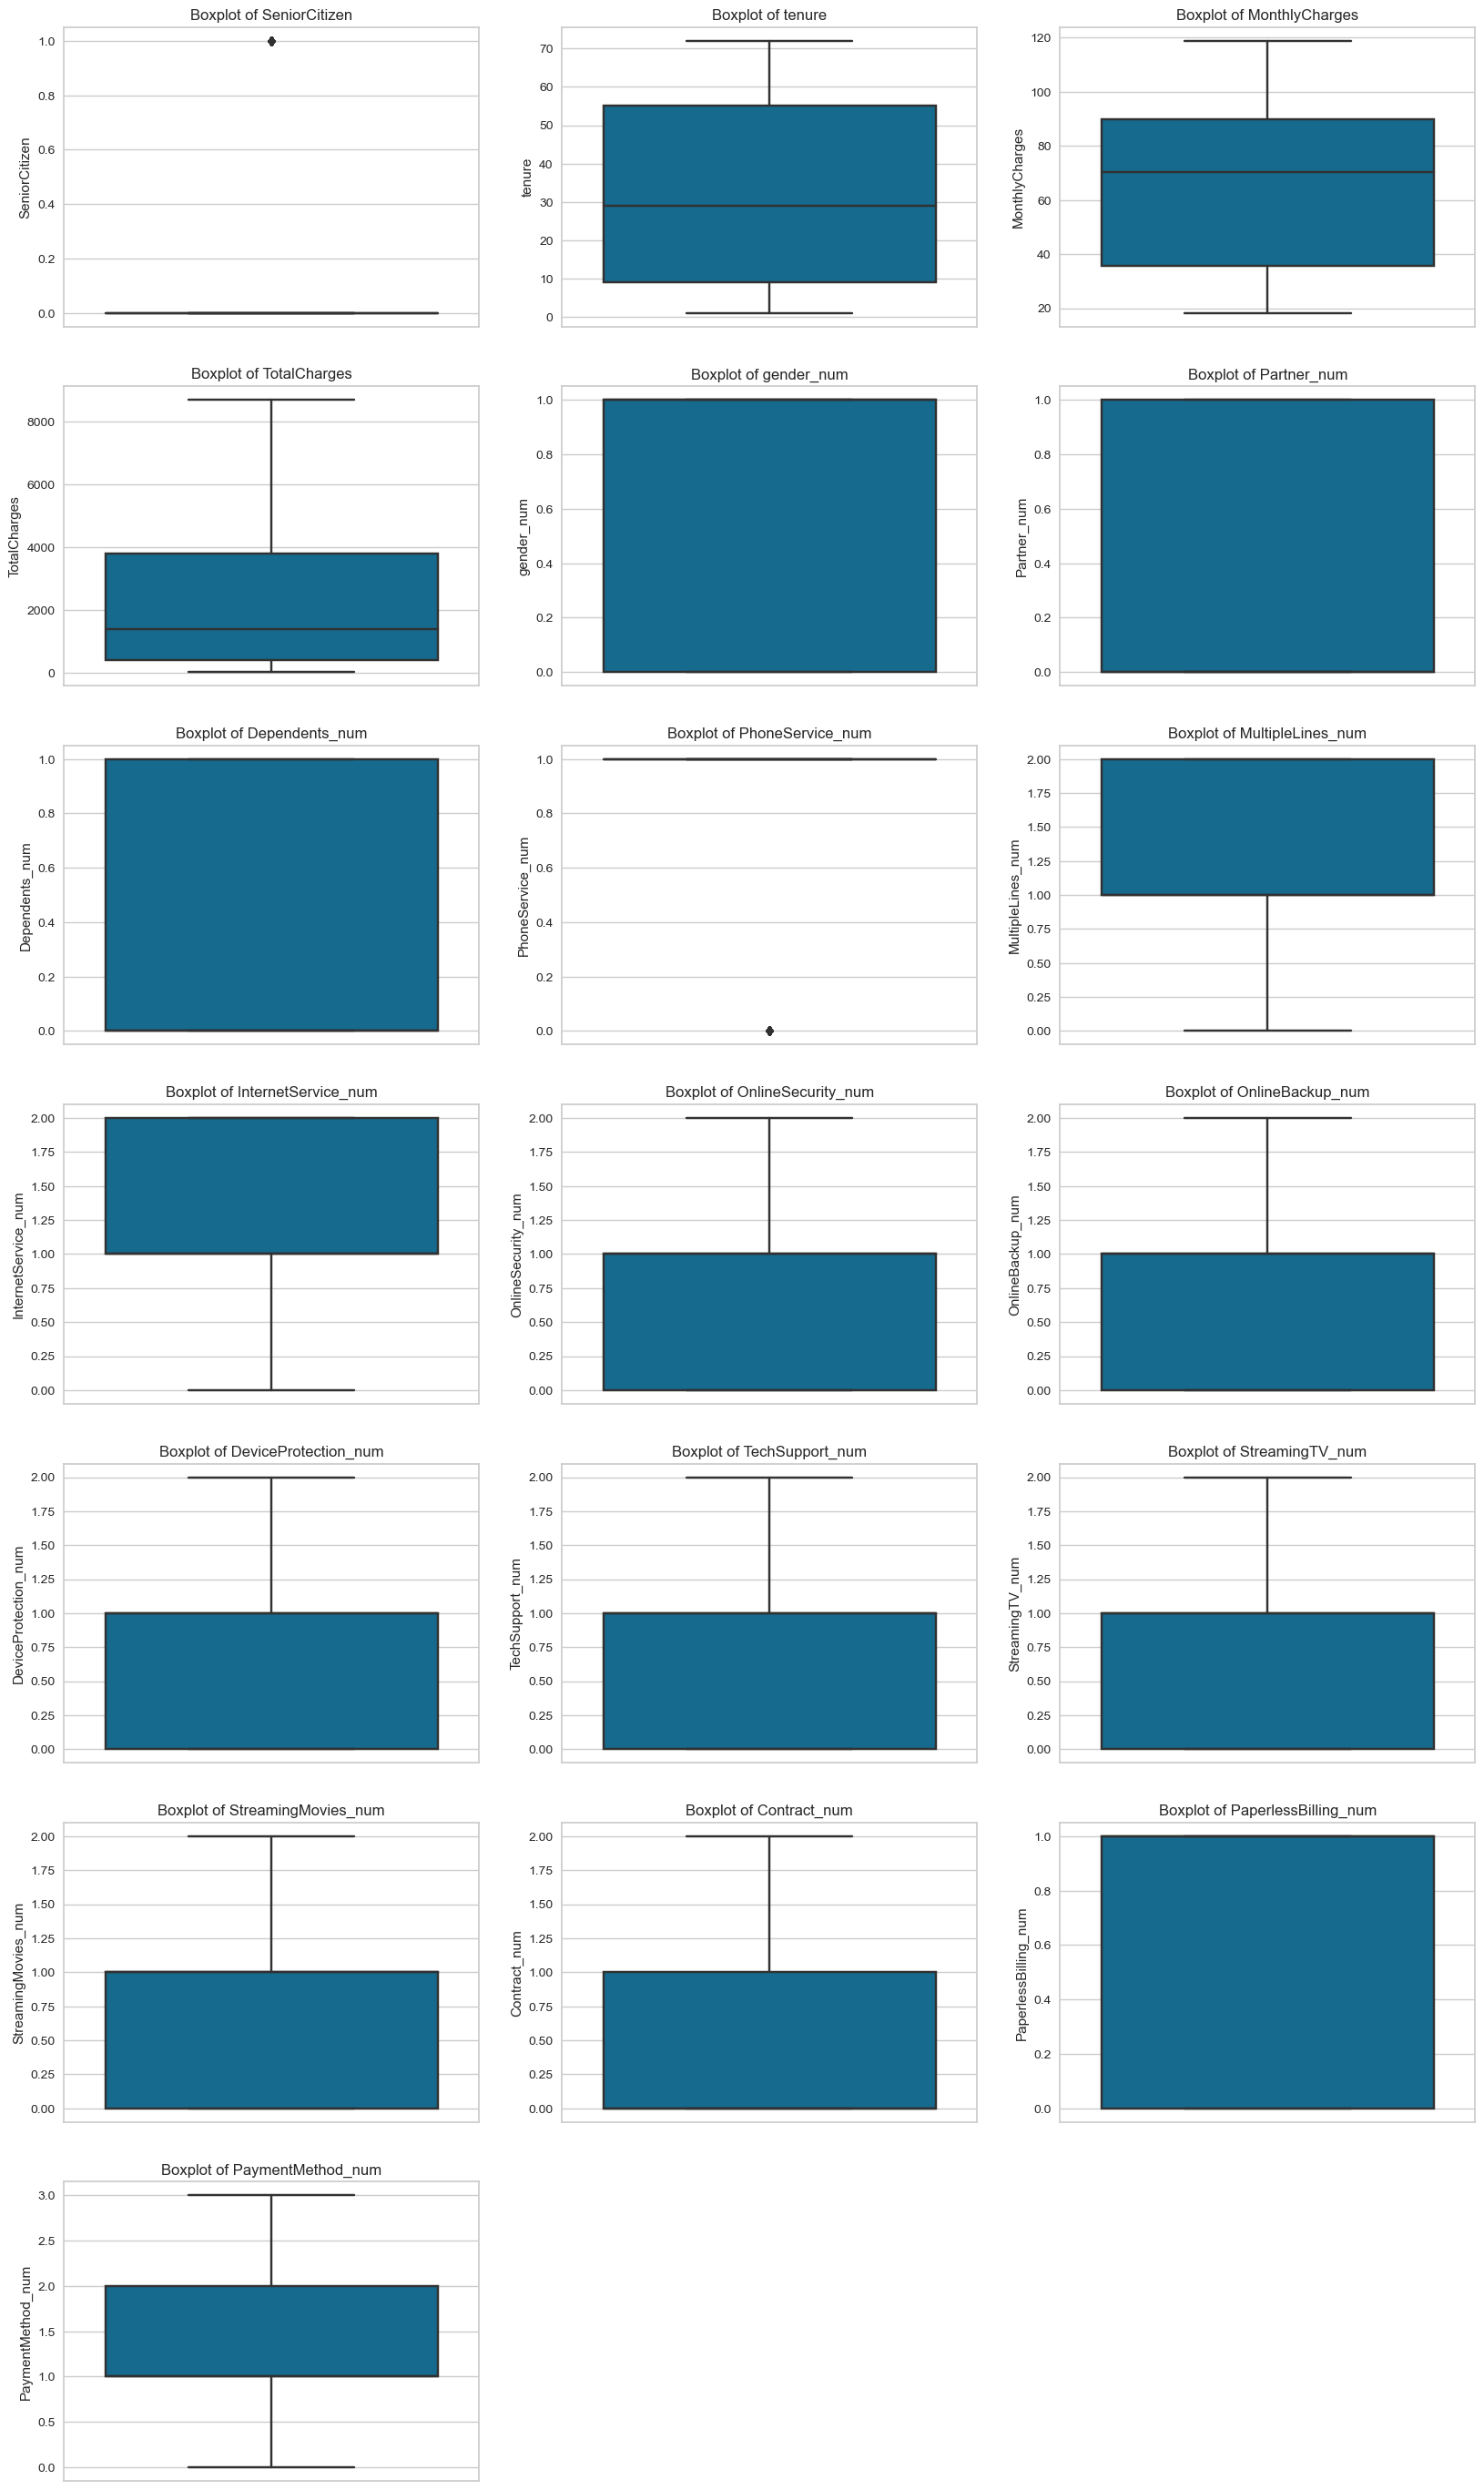

In [210]:
# 컬럼 총 19개가 있다.
plt.figure(figsize = (20,35))#크기 : 20(가로), 35(세로)
for i in range(len(columns)):
    plt.subplot(7,3, i+1)
    sns.boxplot(data=df, y = df[columns[i]])
    plt.title("Boxplot of "+columns[i]) # title는 ,를 이용해서 값을 추가 못한다.

### 중복값 확인

In [211]:
df.duplicated().sum()

0

## ERD(탐색적 데이터 분석)
* 고객 이탈인 Churn을 보면서 어떤경우에 탈퇴하는지를 살펴보자

### 고객정보 기반 데이터 탐색

#### 성별 탈퇴율
* PaymentMethod : 결제 수단(Electronic개인 계좌를 열어놓고 입금하는 방식, Mailed우편, Bank은행, Credit card신용카드

In [212]:
import numpy as np
gender_gr = df.groupby('gender').agg({'Churn_num':np.mean, 'PaymentMethod_num':sum})
gender_gr

,Churn_num,PaymentMethod_num
gender,,
Female,0.269595,4997
Male,0.262046,5015


In [213]:
# tenure : 서비스 이용기간( 개월 수 )
tenure_gr = df.groupby('tenure').agg({'Churn_num':np.mean})
tenure_gr

,Churn_num
tenure,
1,0.619902
2,0.516807
3,0.470000
4,0.471591
5,0.481203
...,...
68,0.090000
69,0.084211
70,0.092437


##### 결론
* 성별에 따른 탈퇴 이유는 따로 존재하지 않는다

#### 사용기간에 따른 탈퇴율

In [214]:
#사용기간 그룹별 타뢰 평균
tenure_gr = df.groupby('tenure').agg({'Churn_num':np.mean})
tenure_gr
#탈퇴에 대한 평균값이 되므로 탈퇴를 하면 1이며, 그렇지 않은 경우0이 된다.
# 평균값이 높다는 것은 1이 많다는 것과 탈퇴를 많이 한다는 것이 된다

,Churn_num
tenure,
1,0.619902
2,0.516807
3,0.470000
4,0.471591
5,0.481203
...,...
68,0.090000
69,0.084211
70,0.092437


<AxesSubplot:xlabel='tenure', ylabel='Churn_num'>

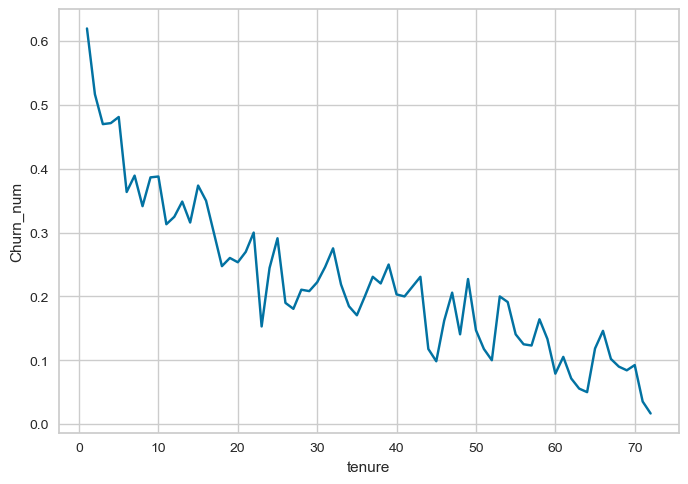

In [215]:
import seaborn as sns
sns.lineplot(data=tenure_gr, x='tenure', y='Churn_num')

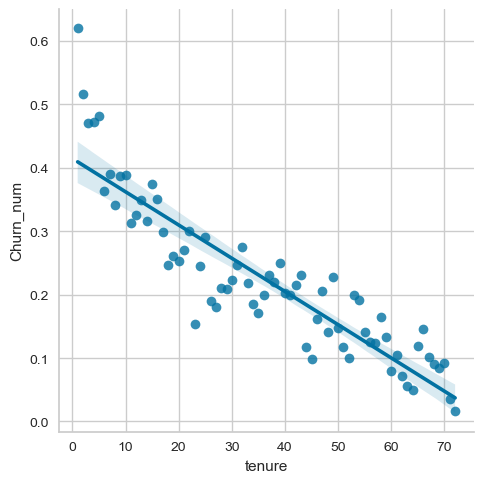

In [216]:
#아래 산점도 그래프를 그릴 경우 x = tenure컬럼명이 들어와야 한다.
#현재 tenure값은 index로 존재하기 때문에 reset_index를 통해 tenure값을 컬럼으로 변경했다
tenure_gr.reset_index(inplace=True)
sns.lmplot(data=tenure_gr ,x='tenure', y='Churn_num')

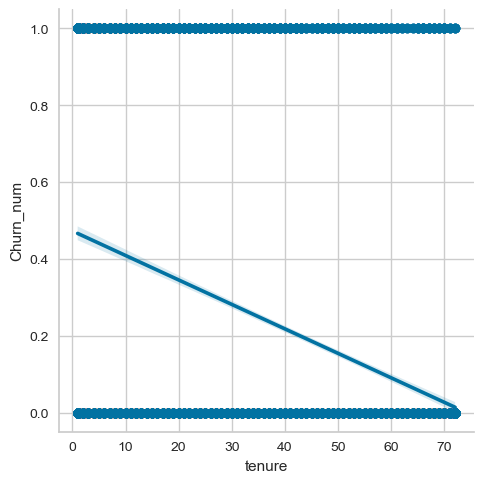

In [217]:
sns.lmplot(data=df ,x='tenure', y='Churn_num')
#산점도를 찍기위해 평균값을 구해서 1개월일 경우 평균 산점도표시
# 2개월일때 평균값 산점도 표시...를하기 위해 그룹별 평균을 구한것이다

##### 결론
* 신규가입자인 경우 탈퇴 평균이 높으며, 기간이 길면 길 수록 탈퇴 평균은 낮아진다는 것을 알 수 있다.

#### 기간에 따른 성별 탈퇴 확인

In [218]:
# hue를 사용하기 위해 groupby함수 사용
sample = df.groupby(['tenure','gender']).agg({'Churn_num':np.mean}).reset_index()
sample

,tenure,gender,Churn_num
0,1,Female,0.654930
1,1,Male,0.589666
2,2,Female,0.523077
3,2,Male,0.509259
4,3,Female,0.495050
...,...,...,...
139,70,Male,0.105263
140,71,Female,0.011905
141,71,Male,0.058140
142,72,Female,0.016949


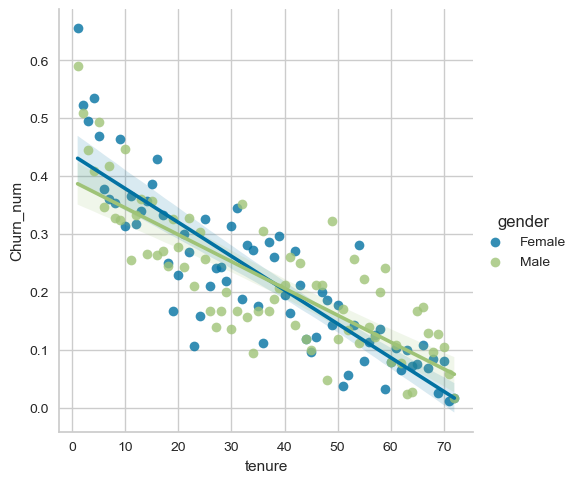

In [219]:
sns.lmplot(data=sample, x='tenure', y='Churn_num', hue='gender')

##### 결론
* 이전에 수치로 확인했던 결과와 마찬가지로 성별에 따른 차이는 크게 나는건 없다

#### 기간에 따른 독신 여부 확인

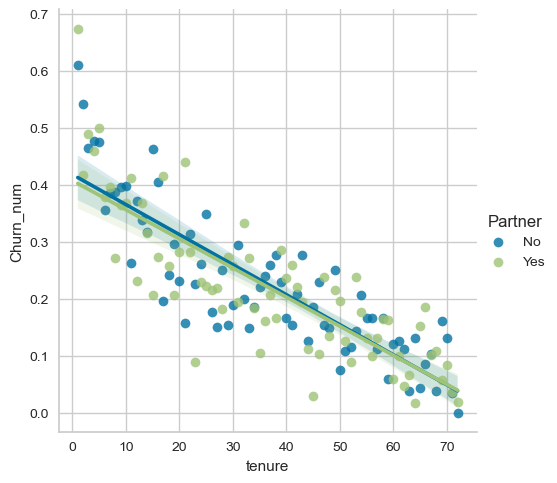

In [220]:
sample = df.groupby(['tenure','Partner']).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=sample, x='tenure', y='Churn_num', hue='Partner')

##### 결론
* 독신여부에 따른 차이 역시 크게 나지는 않는다

#### 기간에 따른 부양가족 확인

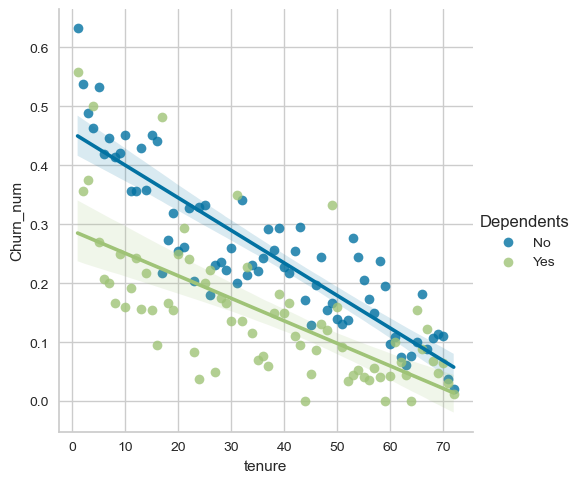

In [221]:
sample = df.groupby(['tenure','Dependents']).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=sample, x='tenure', y='Churn_num', hue='Dependents')

##### 결론
* 부양가족이 있는 고객이 이탈률이 낮다

### 서비스 종류 기반 데이터 탐색
* PhoneService : 전화 서비스 이용여부
* MultipleLines : 다중회선 이용여부
* InternetService : 인터넷 서비스 이용여부, 이용시 종류
* OnlineSecurity : 보안 서비스 이용여부
* OnlineBackup - 정보 백업서비스 이용여부
* DeviceProtection : 단말기 보험 서비스 이용여부
* TechSupport : 기술지원 서비스 이용여부
* StreamingTV : 스트리밍 TV서비스 이용여부
* StreamingMovies : 스트리밍 영화 서비스 이용여부

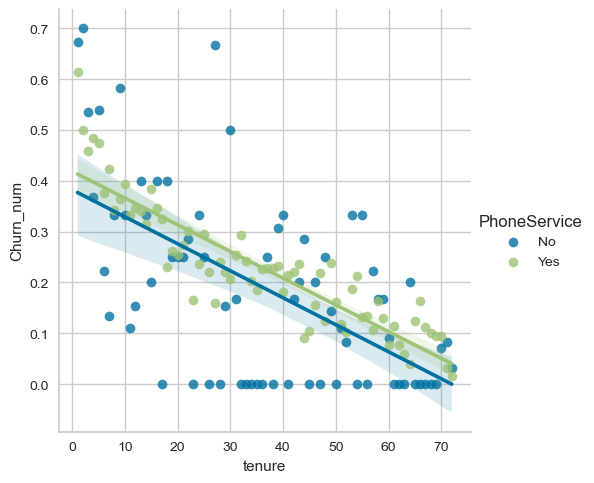

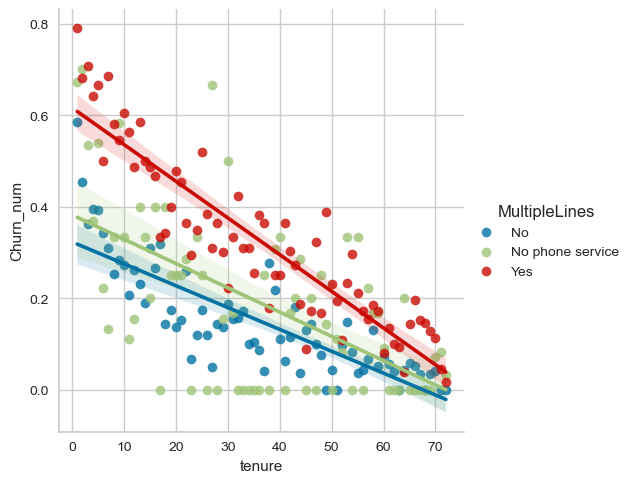

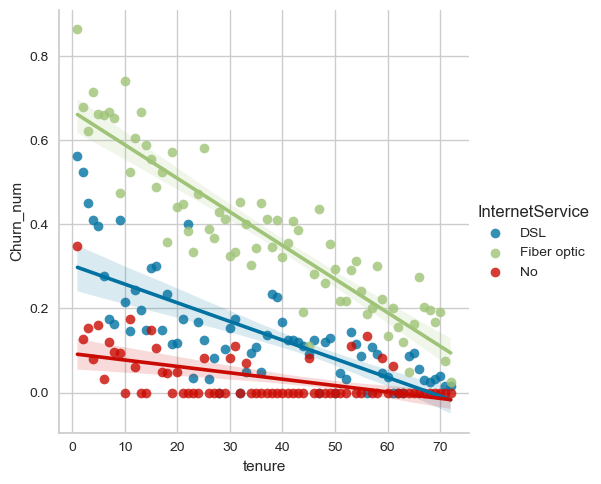

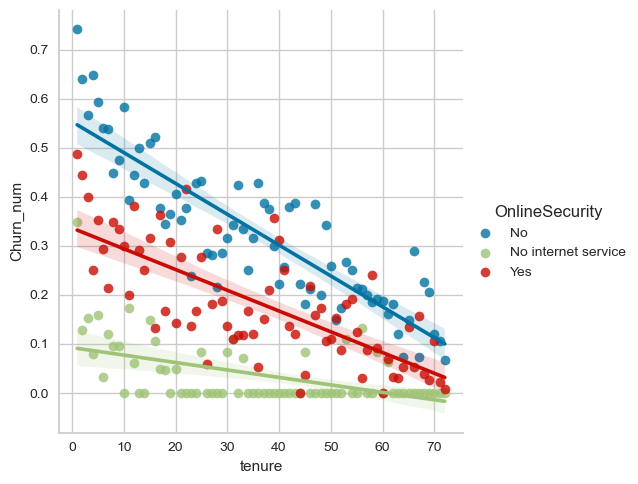

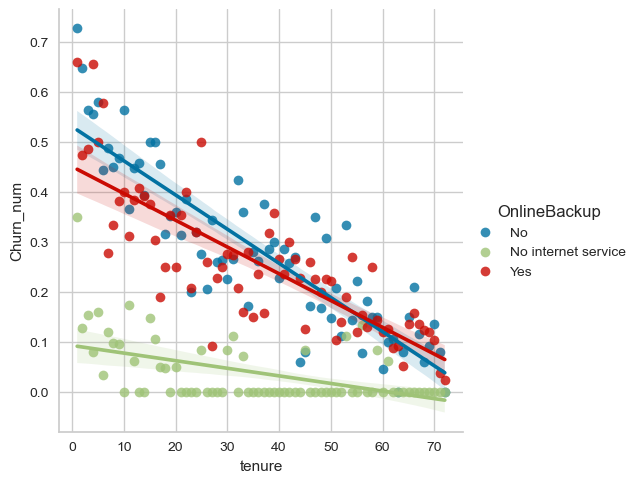

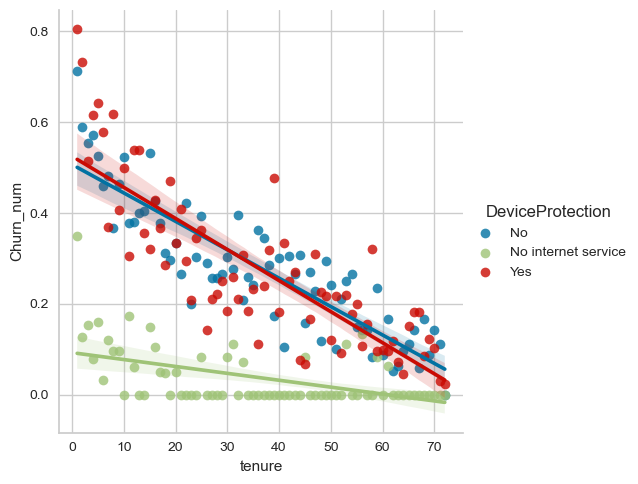

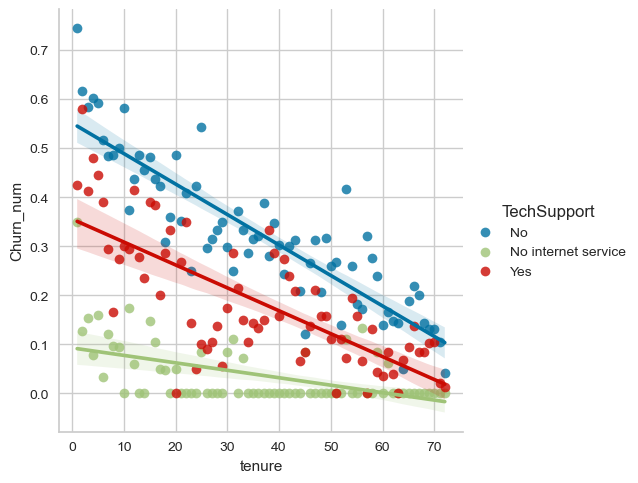

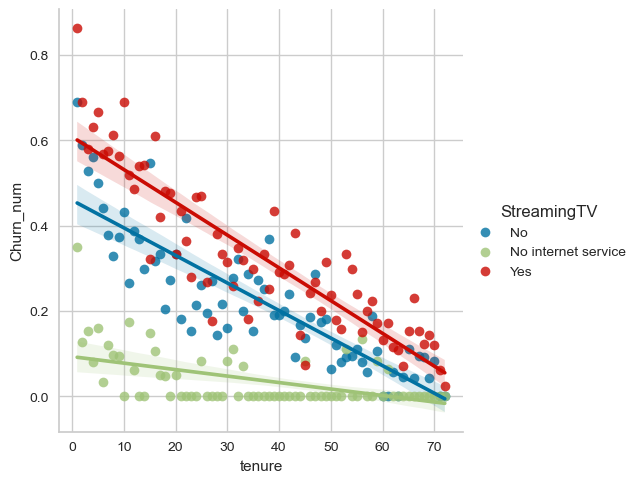

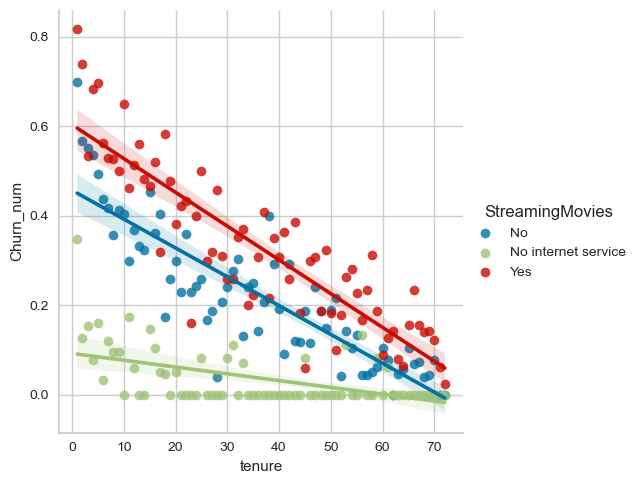

In [222]:
service_name = ['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
                'DeviceProtection','TechSupport','StreamingTV','StreamingMovies' ]
for hue in service_name:
    sample = df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
    sns.lmplot(data=sample, x='tenure', y='Churn_num', hue = hue)

#### 결론
* PhoneService : 전화 서비스 여부에 따른 차이는 크지않다
* MultipleLines : 다중회선 사용고객의 경우 이탈률이 높다.(돈을 더 낼 수록)
* InternetService : 인터넷 서비스 이용시 인터넷 속도가 높을수록 이탈률이 높다.(돈을 더 낼 수록)
* OnlineSecurity : 보안 서비스 이용을 하지 않을수록 이탈률이 더 높다.(돈을 안 낼 수록)
* OnlineBackup : 데이터 백업 서비스, 기기 보호 서비스는 차이가 크지않다
* DeviceProtection : 단말기 보험가입은 가입한사람과 가입하지 않은 사람에 따른 차이는 없다
* TechSupport : 기술지원 서비스를 받지 않을수록 이탈률이 더 높다.(돈을 안 낼 수록)
* StreamingTV,StreamingMovies : 스트리밍 TV, 영화 서비스는 받는 경우 이탈률이 더 높다.(돈을 더 낼 수록)

### 결제 정보 기반 데이터 탐색
* Contract : 결제 갱신주기(매 월 / 1년마다 / 2년마다)
* PaperlessBilling : 종이없는 청구서 이용여부
* PaymentMethod : 결제 수단
>
* 아래의 컬럼은 사용할 수 없다. 청구금액은 범위가 많아서 hue로 진행하면 안된다
* MonthlyCharges : 월 청구금액
* TotalCharges : 총 청구금액(계약기간동안 총 납부 금액)

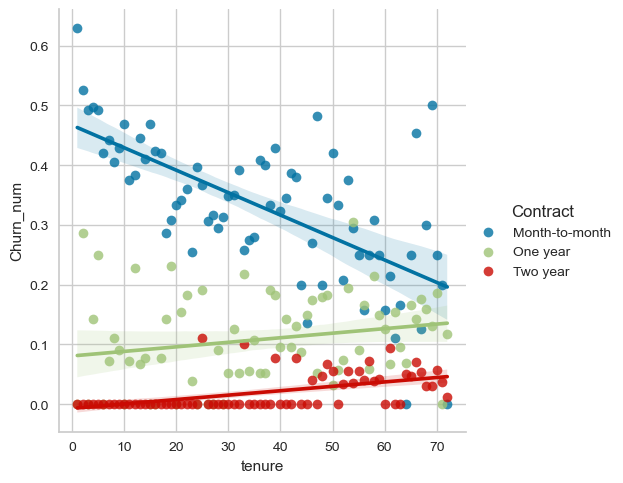

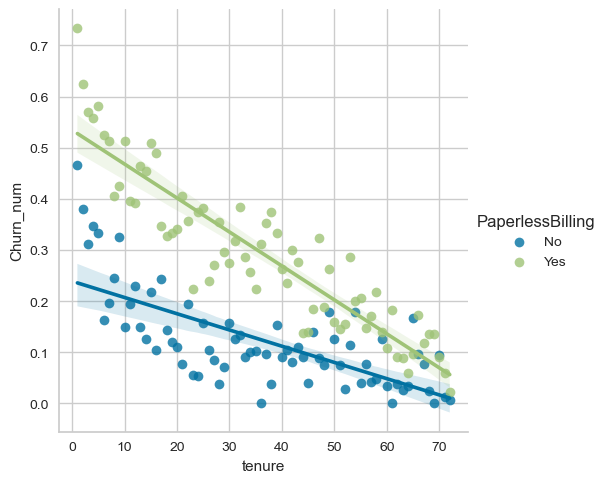

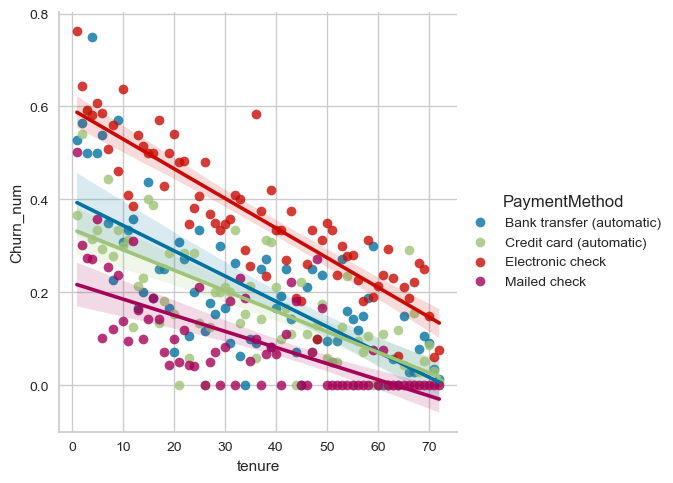

In [223]:
service_name = ['Contract','PaperlessBilling','PaymentMethod']
for hue in service_name:
    sample = df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
    sns.lmplot(data=sample, x='tenure', y='Churn_num', hue = hue)

#### 결론
* Contract : 갱신주기(결제주기)가 길어질수록 이탈률이 낮다.
* 갱신주기가 년으로 긴 경우에는 기간이 길어질수록 이탈률이 높다.
* PaperlessBilling : 청구서 형태의 경우 종이없는 청구서를 이용한 고객 이탈률이 높다.
* PaymentMethod : 결제방식의 경우 전자통지서가 가장 이탈률이 높았고
* 지로통지서(우리 집 우체통으로 오는 것)가 가장 낮았다.
* 자동결제의 경우 중간 정도의 이탈률을 보였습니다.

## 군집

### 실루엣 확인

In [224]:
columns = ['TotalCharges','MonthlyCharges','tenure','SeniorCitizen','gender_num', 
    'Partner_num', 'Dependents_num', 'PhoneService_num','MultipleLines_num', 'InternetService_num', 
    'OnlineSecurity_num','OnlineBackup_num', 'DeviceProtection_num', 'TechSupport_num','StreamingTV_num',
    'StreamingMovies_num', 'Contract_num','PaperlessBilling_num', 'PaymentMethod_num']

In [225]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
all_scores = []
i=1
while i < 10:
    i += 1
    
    model = KMeans(n_clusters = i)
    model.fit(df[columns])
    
    sil_score = silhouette_score(df[columns], model.labels_)
    #cluster_num : i(클러스터 개수) 일때 실루엣 점수 
    score_dic = {'cluster_num':i, 'sil_score':sil_score}
    all_scores.append(score_dic)
score_df = pd.DataFrame(all_scores)

In [226]:
score_df

,cluster_num,sil_score
0,2,0.702942
1,3,0.644586
2,4,0.601979
3,5,0.596614
4,6,0.594822
5,7,0.583417
6,8,0.569048
7,9,0.565764
8,10,0.562960


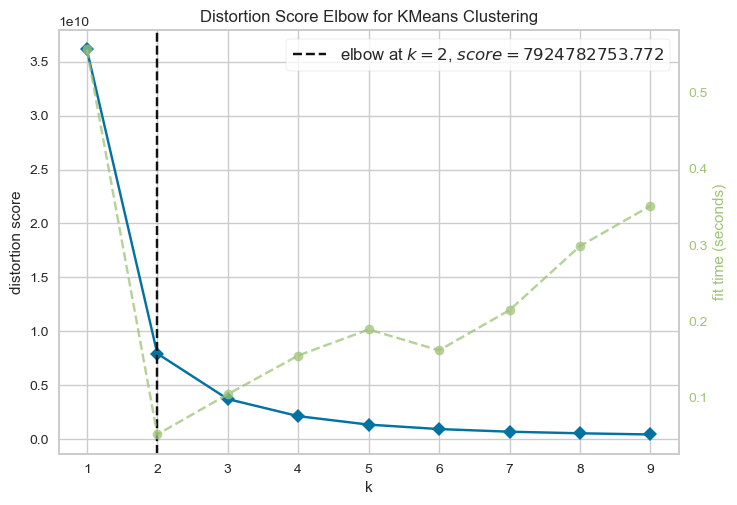

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [227]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k : 해당 모델의 군집할 개수 1~ 10 사이에 표현해 준다
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(df[columns])
visualizer.show()
#검은색 줄이 클러스터의 개수를 표현해 준다고 보면 된다.

### 군집화
* 2개의 군집으로 나왔기 때문에 2개의 그룹으로 군집화를 진행

In [228]:
columns = ['TotalCharges','MonthlyCharges','tenure','SeniorCitizen','gender_num', 
    'Partner_num', 'Dependents_num', 'PhoneService_num','MultipleLines_num', 'InternetService_num', 
    'OnlineSecurity_num','OnlineBackup_num', 'DeviceProtection_num', 'TechSupport_num','StreamingTV_num',
    'StreamingMovies_num', 'Contract_num','PaperlessBilling_num', 'PaymentMethod_num']

km = KMeans(n_clusters=2, init='k-means++', random_state=62)
km.fit(df[columns])

df['cluster'] = km.labels_
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,OnlineBackup_num,DeviceProtection_num,TechSupport_num,StreamingTV_num,StreamingMovies_num,Contract_num,PaperlessBilling_num,PaymentMethod_num,Churn_num,cluster
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,1,0,0,0,0,0,1,1,0,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,0,1,0,0,0,1,0,0,0,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,1,0,0,0,0,0,1,0,1,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,0,1,1,0,0,1,0,2,0,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,0,0,0,0,0,0,1,1,1,1


### 군집화별 탈퇴 확인

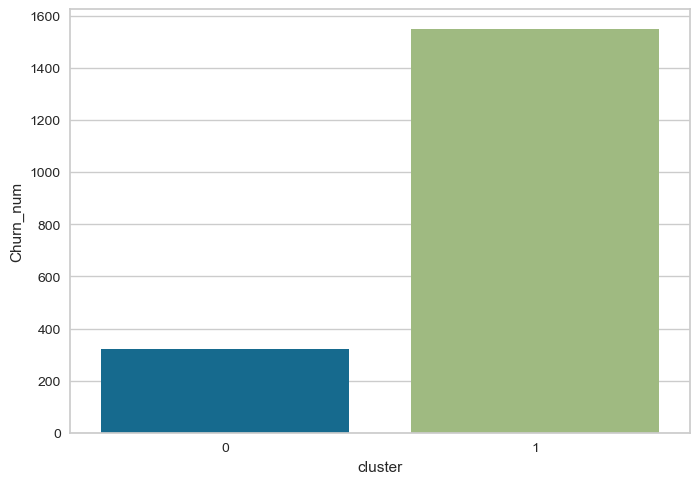

In [229]:
df_churn = df.groupby('cluster').agg({'Churn_num':sum}).reset_index()
sns.barplot(data=df_churn, x='cluster',y = 'Churn_num', ci=None);
# 각 그룹별 이탈률을 보면 1번 그룹이 제일 높다. 
# 그럼 1번 그룹에 어떠한 서비스를 이용하는지 확인해 보자

> 모든 컬럼을 분석하기에 시간이 다소 걸리므로 몇 가지만 확인해 보도록 하자

In [230]:
df.groupby('cluster').sum()
#군집화 별 합에 대한 모든 컬럼을 출력한다

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_num,Partner_num,Dependents_num,PhoneService_num,MultipleLines_num,InternetService_num,OnlineSecurity_num,OnlineBackup_num,DeviceProtection_num,TechSupport_num,StreamingTV_num,StreamingMovies_num,Contract_num,PaperlessBilling_num,PaymentMethod_num,Churn_num
cluster,,,,,,,,,,,,,,,,,,,,
0,443,123209,190642.1,11209001.8,1043,1429,701,1995,3509,3486,1134,1410,1429,1165,1515,1522,2452,1466,3896,321
1,699,104781,265018.9,4847166.9,2506,1964,1398,4357,5810,5122,3921,4055,4029,3915,4228,4249,2390,2702,6116,1548


In [231]:
#df_out = df.groupby('cluster').sum()[['TotalCharges','MonthlyCharges','tenure','SeniorCitizen','gender_num', 
#    'Partner_num', 'Dependents_num', 'PhoneService_num','MultipleLines_num', 'InternetService_num', 
#    'OnlineSecurity_num','OnlineBackup_num', 'DeviceProtection_num', 'TechSupport_num','StreamingTV_num',
#    'StreamingMovies_num', 'Contract_num','PaperlessBilling_num', 'PaymentMethod_num']].reset_index()


columns = ['PhoneService_num','MultipleLines_num','InternetService_num','OnlineSecurity_num'
          ,'OnlineBackup_num','DeviceProtection_num','TechSupport_num','StreamingTV_num','StreamingMovies_num']

#군집화별 합을 구한 컬럼들만 확인한고 인덱스를 새롭게 만든다
df_out = df.groupby('cluster').sum()[columns].reset_index()
df_out.head(3)

,cluster,PhoneService_num,MultipleLines_num,InternetService_num,OnlineSecurity_num,OnlineBackup_num,DeviceProtection_num,TechSupport_num,StreamingTV_num,StreamingMovies_num
0,0,1995,3509,3486,1134,1410,1429,1165,1515,1522
1,1,4357,5810,5122,3921,4055,4029,3915,4228,4249


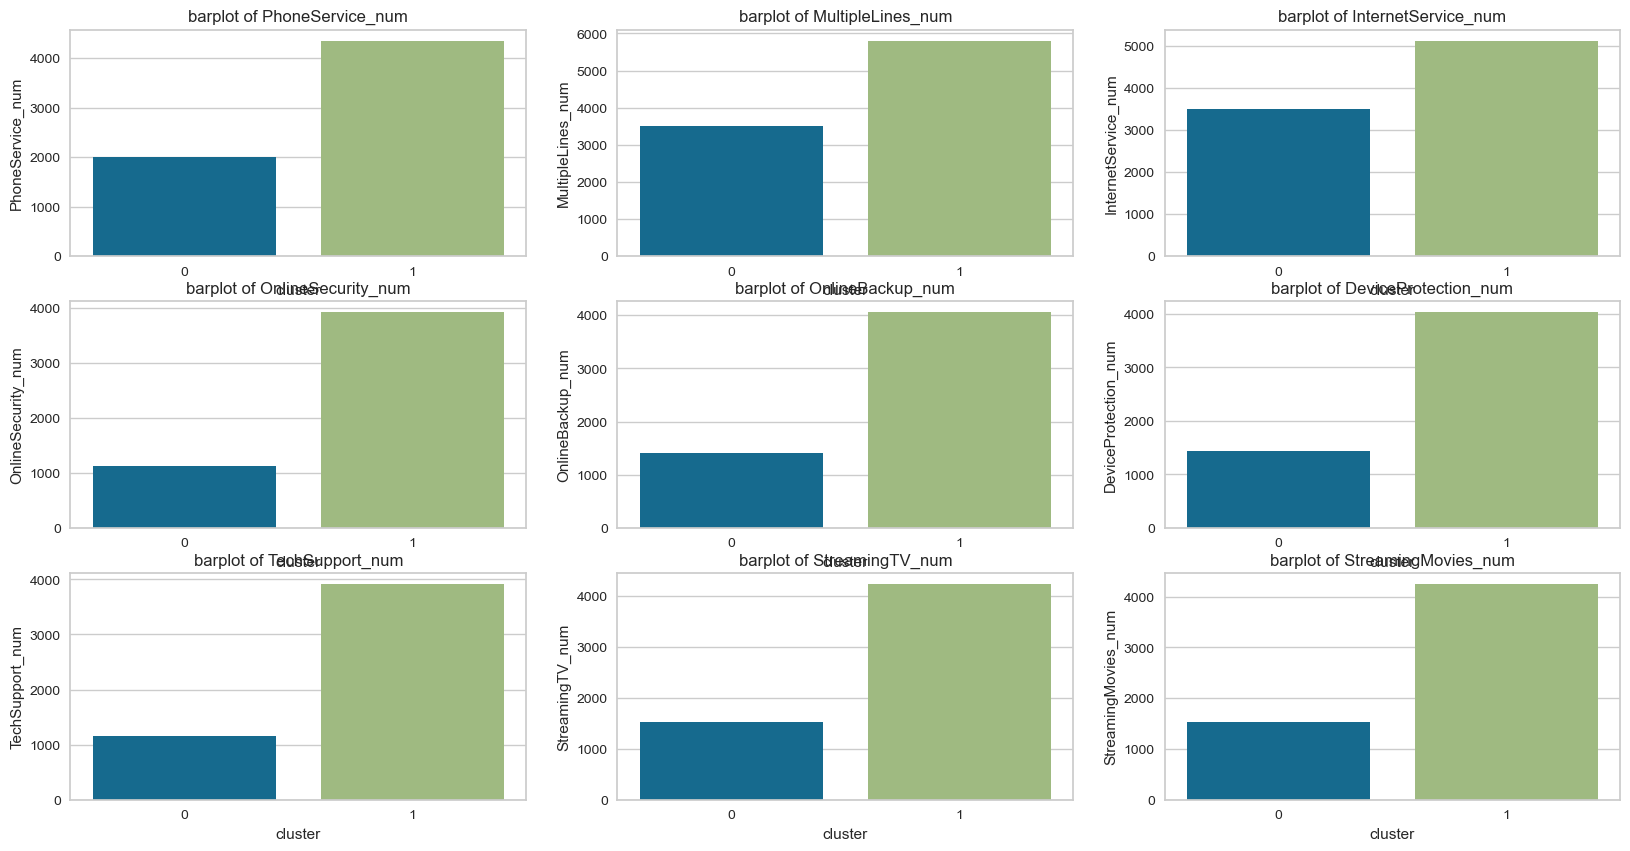

In [232]:
plt.figure(figsize = (20,10))

for i in range(len(columns)):
    plt.subplot(3,3,i+1)
    sns.barplot(data=df_out, x='cluster',y = columns[i]);
    plt.title('barplot of '+columns[i])

### 결론
* 1번 그룹들의 정보를 확인해 보면 1번 그룹은 해당 텔레콤 회사의 모든 서비스를 맘에 안들어 하는것 같다
* 텔레콤 회사의 서비스별 1번 그룹 이탈율이 다른 그룹에 비해 월등히 높다는 것을 알 수 있다.
* 1번 그룹들의 이탈을 방지하기 위해서는 1번 그룹들이 원하는 서비스를 새롭게 제공해줘야 할 것 같다
>
* 그리고 MultipleLines, internetService에는 0번 그룹도 다른 서비스에 비해 탈퇴 율이 높다. 그럼 인터넷 서비스 역시 조치를 취해야 할 것이다